In [1]:
# Outline(Map):

# Step 0: Getting Started (Introduction on the project and data) ;
# Step 1: Data Exploration; 
# ~~~~~~~~Step 1.2-Implementation: calculate statistics;
# ~~~~~~~~Step 1.3-Question 1: Feature Obervation;
# Step 2: Developing a model;
# ~~~~~~~~Step 2.2-Implementation: define a performance metric;
# ~~~~~~~~Step 2.3-Question 2: Goodness of Fit;
# ~~~~~~~~Step 2.4-Implementation: shuffle and split data;
# ~~~~~~~~Step 2.5-Question 3: Train and testing;
# Step 3: Analyzing model performance;
# ~~~~~~~~Step 3.2-Learning curve;######(PROBLEMS)######
# ~~~~~~~~Step 3.3-Question 4: Learning the data;
# ~~~~~~~~Step 3.4-Complexity Curve;
# ~~~~~~~~Step 3.5-Question 5: Bias-Variance Tradeoff;
# ~~~~~~~~Step 3.6-Question 6: Best-Guess Optimal Model;
# Step 4: Evaluating Model Performance;
# ~~~~~~~~Step 4.2-Question 7: Grid Search;######(PROBLEMS)######
# ~~~~~~~~Step 4.3-Question 8: Cross-Validation;######(PROBLEMS)######
# ~~~~~~~~Step 4.4-Implementation: fitting a model;
# ~~~~~~~~Step 4.5-Make predictions
# ~~~~~~~~Step 4.6-Question 9: Optimal Model;
# ~~~~~~~~Step 4.7-Question 10: Predicting Selling price;
# ~~~~~~~~Step 4.8-Sensitivity;
# ~~~~~~~~Step 4.9-Question 11: Applicability;


In [10]:
# Step 0: Getting Started (Introduction on the project and data) ;


# Goal: construct an effective model on predicting house prices
# Info: on 1978 Boston house mkt, trained and tested, 506 entries/agg data, 14 features, 


# Import libraries for this project
import numpy as np
import pandas as pd   ###!!!Hey, pay attentions here. Why, someone uses pd to calculate stas and they are sample stas. That's wrong, cuz we need population stas. But why ppl?
from sklearn.cross_validation import ShuffleSplit
# Import supplementary visualization code
import visuals as vs 
# Pretty display for notebook
%matplotlib inline
from IPython.display import display
# Load the Bostion housing dataset
data = pd.read_csv('housing.csv')

features = data.drop('MEDV', axis =1)###!!!Confused here, why drop axis =1; I think MEDV is a relevant feature. 

# Success
print "Boston housing dataset has {} data points with {} variables each".format(*data.shape)


price = np.array(data['MEDV'])
# price = data['MEDV']
# display(price)


# Display actual data  
# pd.options.display.max_rows = 10
# display(data)

# Display statisticss of the data through pandas. (usually use numpy)
df = pd.DataFrame(data)
df.describe()


# Question on np and pd: why do we need population data instead of sample. 
# So, how can I use pandas to calculate sample stats?

Boston housing dataset has 489 data points with 4 variables each


,RM,LSTAT,PTRATIO,MEDV
count,489.000000,489.000000,489.000000,4.890000e+02
mean,6.240288,12.939632,18.516564,4.543429e+05
std,0.643650,7.081990,2.111268,1.653403e+05
min,3.561000,1.980000,12.600000,1.050000e+05
25%,5.880000,7.370000,17.400000,3.507000e+05
50%,6.185000,11.690000,19.100000,4.389000e+05
75%,6.575000,17.120000,20.200000,5.187000e+05
max,8.398000,37.970000,22.000000,1.024800e+06


In [9]:
# Step 1: Data Exploration; 

# in this section, 
# get familiar with the data through an explorative process;
# ~~~~~~~ seperate dataset into "features" and "target variable";
# ~~~~~~~ The features, 'RM', 'LSTAT', 'PTRATIO, are quantitative information about each data point;(stored in features)
# ~~~~~~~ The target variable, 'MEVD', will be the variable we seek to predict;(stored in prices)
# make a cursory investigation about BST housing data;
# write observations;


In [8]:
# ~~~~~~~~Step 1.2-Implementation: calculate statistics;


# In this section,
# calculate descriptive statistics about BST housing prices; Dude, this is freaking important. 


# minimum price of the data
minimum_price = np.min(price)

# maximum price of the data
maximum_price = np.max(price)

# mean price of the data
mean_price = np.mean(price)

# median price of the data
median_price = np.median(price)

# standard deviation prices of the data
standard_deviation = np.std(price)


# show the calculated statistics 
print "Statistics for the Boston housing dataset:\n"
print "Minimum price: ${:,.2f}".format(minimum_price)
print "Maxmum price: ${:,.2f}".format(maximum_price)
print "Mean price: {:,.2f}".format(mean_price)
print "Median price: {:,.2f}".format(median_price)
print "Standard deviation: {:,.2f}".format(standard_deviation)


Statistics for the Boston housing dataset:

Minimum price: $105,000.00
Maxmum price: $1,024,800.00
Mean price: 454,342.94
Median price: 438,900.00
Standard deviation: 165,171.13


In [12]:
# ~~~~~~~~Step 1.3-Question 1: Feature Obervation;

# Remember, we are three features: 'RM', 'LSTAT', 'PTRATIO', and for each data point:
# 'RM': the average number of room among homes in the neigborhood.
# 'LSTAT': the precentage of homeowners in the neigborhood considered "lower class", working poor. 
# 'PTRATIO': the ratio of students to teachers in primary and secondary schools in the neigborhood.


# Answer to the Question1:
# Intuitionally speaking, the increase in the value of the feature 'RM' will increase the value of 'MEDV', and vice versa,
# ~~~~~~~~~~~~~~~~~~~~~~~~because the more rooms correlates the larger squrefeet, which means higehr prices. 

# ~~~~~~~~~~~~~~~~~~~~~~~~the increase in the value of the feature 'LSTAT' will decrease the value of 'MEDV', and vice versa,
# ~~~~~~~~~~~~~~~~~~~~~~~~because from common sense, the rich affords more to live in a better place. 

# ~~~~~~~~~~~~~~~~~~~~~~~~the increase in the value of the feature 'PTRATO' will decrease the value of 'MEDV', and vice versa.
# ~~~~~~~~~~~~~~~~~~~~~~~~because the lower ratio of students to teachers, the more resources a student get access, and it means the more cost 
# ~~~~~~~~~~~~~~~~~~~~~~~~to a family. The families that can send their children to schools with lower students to teachers ratios
# ~~~~~~~~~~~~~~~~~~~~~~~~are not poor, which means, their house prices might be higher.

# Statistically speaking, according to the correlation among those features, 
# ~~~~~~~~~~~~~~~~~~~~~~~~an unit increase in the value of feature'RM' will increase about 0.697 of 'MEDV';
# ~~~~~~~~~~~~~~~~~~~~~~~~an unit increase in the value of feature 'LSTAT' will decrease about 0.761 of 'MEDV';
# ~~~~~~~~~~~~~~~~~~~~~~~~an unit increase in the value of feature 'PTRATIO' will decrease about 0.519 of 'MEDV'.


In [11]:
correlation = data.corr()
display(correlation)


,RM,LSTAT,PTRATIO,MEDV
RM,1.000000,-0.612033,-0.304559,0.697209
LSTAT,-0.612033,1.000000,0.360445,-0.760670
PTRATIO,-0.304559,0.360445,1.000000,-0.519034
MEDV,0.697209,-0.760670,-0.519034,1.000000


In [14]:
# Step 2: Developing a model;

# In this section, 
# develop tools and techniques for a model to make a prediction.

# (Be able to make accurate evaluations of each model's performance.
# How?
# through these tools and techniques)
# R-squared, coefficient of determination, is useful in regression analysis.

In [13]:
# ~~~~~~~~Step 2.2-Implementation: define a performance metric;


# calculate coefficient of determination, R-squared, to quantify your model's performance. How "good" a model is.
# the squared correlation between the predicted and actual valued of the targeted variable. 

from sklearn.metrics import r2_score

def performance_metric(y_true, y_predict):
    score = r2_score(y_true, y_predict)
    return score 

# print score
#mark: name 'score' is not defined,Why?


In [18]:
# ~~~~~~~~Step 2.3-Question 2: Goodness of Fit;

score = performance_metric([3.0, -0.5, 2.0, 7.0, 4.2],[2.5, 0.0, 2.1, 7.8, 5.3])

print "Model has a coefficient of deterination, R-squared, of {:.3f}.".format(score)

a = [3.0, -0.5, 2.0, 7.0, 4.2]
b = [2.5, 0.0, 2.1, 7.8, 5.3]

# score2 = performance_metric(a, b)
# print score2

Model has a coefficient of deterination, R-squared, of 0.923.


In [19]:
# Answer to the question 2: Yes, this model has successfully captured the variation of the target variable. 
# Because according to the r-squared, 92.3% of dependent variable can be predicted from the independent varible.


In [21]:
# df = pd.DataFrame(data)
# df.describe()


In [69]:
# ~~~~~~~~Step 2.4-Implementation: shuffle and split data;

# In this section 
# let's touch real data. Take Boston housing dataset and split data into training and testing subsets

from sklearn.cross_validation import train_test_split 

# what I need to do here is, use np, combine features and prices (into X and y?)
# then, call train_test_split function to split the combination of features and prices.

features = np.array(data[['RM','LSTAT','PTRATIO']])
prices = np.array(data['MEDV'])

X_train, X_test, y_train,y_test = train_test_split(features, prices, test_size = 0.2, random_state = 21)
###!!! mark: why random state is 21 or 42? 

# success
print "Training and testing split was successful."


Training and testing split was successful.


In [70]:
# ~~~~~~~~Step 2.5-Question 3: Train and testing;
# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~ What is benefit the benefit to splitting a dataset into some ratio of training and 
# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~ testing subsets for a learning algorithm?


In [71]:
# Answer to the question 3:
# a model might perform well based on the given data, 
# but we are not sure if it's memorizing the data points and overfitting accompanied with high-variance. 
# Since the goal of the model is to predict new data points, 
# in order to check how well a model is after we built the model,
# we test it through randomly split data into training set and testing set.
# Use training set to train the model and use the testing set to test results.
# Also, the size for the training set shall be large enough, like geater than 0.75 or 0.8, 
# otherwise, our model would be underfitting accompanied with high-bias due to the lack of training data. 


In [72]:
# Step 3: Analyzing model performance;

# In this section,
# take a look at several models' learning and testing performances on various subset of training data.
# Also, investigate one particular algorithm with an increasing 'max_depth' parameter on the full training set to 
# oberve how model complexity affects performance.


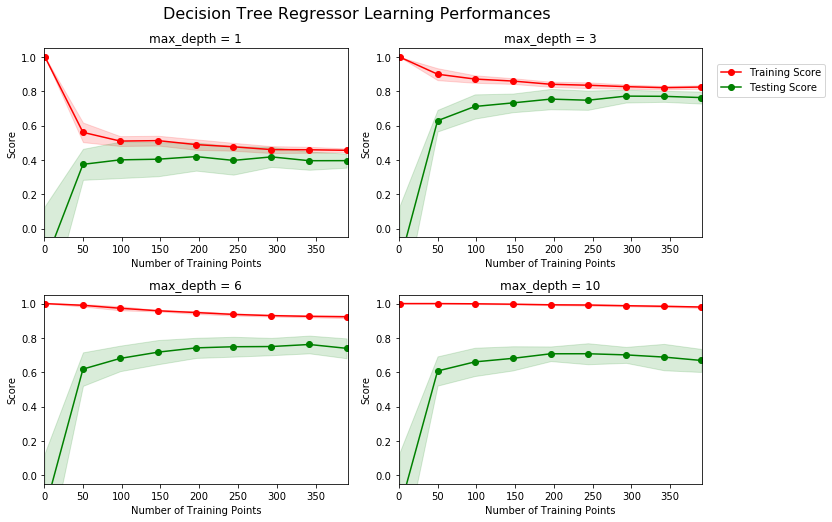

In [73]:
# ~~~~~~~~Step 3.2-Learning curve;

# produce learning curves for varying training set sizes and maximum depths
vs.ModelLearning(features, prices)


In [64]:
# ~~~~~~~~Step 3.3-Question 4: Learning the data;

# ~~~~~~~~Choose one of the graphs above and state the maximum depth for the model
# Answer: I choose the upper left one. The maximum depth is 1.


In [65]:
# ~~~~~~~~What happens to the score of the training curves as more training points are added?
# Answer:
# As the number of training points increases, the train score drops and the decrease of the score marginally dimishes.
# About the testing score, with more training points added, the score goes up, and until the number of the training points
# around about from 300 to 350, it tends to run parallel with the training score. 


# For the max_depth = 1, the approximately converging score is about 0.4 as the number of training points increases, 
# which would not be necessary to add more training points. 



In [66]:
# ~~~~~~~~Would having more training points benefit the model?
# Answer: It depends. For max_depth = 3 or 6, with more training points coming, the model might converge.
# For max_depth =1, the low score makes the model less effective. 
# For max_depth = 10, there is no tendency of converge with more training data coming. 


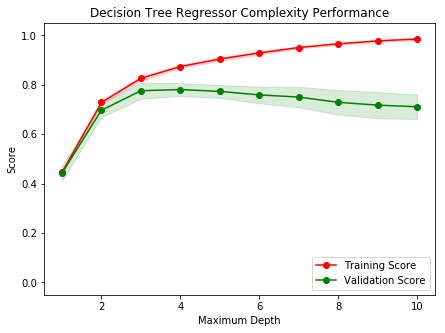

In [75]:
# ~~~~~~~~Step 3.4-Complexity Curve;

# a graph for a decision tree model 

vs.ModelComplexity(X_train, y_train)


In [76]:
# ~~~~~~~~Step 3.5-Question 5: Bias-Variance Tradeoff;

# ~~~~~~~~When the model is trained with a maximum depth of 1, does the model suffer from high bias or high variance?
# Answer: it suffers from high bias, which is underfitting.
# ~~~~~~~~Because both training and validation scores are low.  
# ~~~~~~~~Many data points from training set and validation set have been ignored at maximum depth of 1. 


In [77]:
# ~~~~~~~~How about the model is trained with a maximum depth of 10? What visual cues in the graph justify your conclusions?
# Answer: it suffers from high variance, which is overfitting. 
# ~~~~~~~~Because training score is much higher than the validation score. 
# ~~~~~~~~It seems that the train model is memorizing the data points, so the model performs well on training points,
# ~~~~~~~~but it performs poorly on validation score at maximum depth of 10. 


In [79]:
# ~~~~~~~~Step 3.6-Question 6: Best-Guess Optimal Model;

# ~~~~~~~~Which maximum depth do you think results in a model that best generalizes to unseen data?
# Answer: When maximum depth = 3, it generalizes the best results to unseen data.


In [78]:
# ~~~~~~~~What intuition lead you to this answer?
# Answer: Because the validation score is highest among different maximum depths. 


In [80]:
# Step 4: Evaluating Model Performance;

# In this section,
# construct a model and make a prediction on the client's feature set
# using an optimized model from fit_model


In [81]:
# ~~~~~~~~Step 4.2-Question 7: Grid Search;

# ~~~~~~~~What is the grid search technique?
# ~~~~~~~~How it can be applied to optimize a learning algorithm?
# Answer: 
# when we use some algorithms to train some data, 
# there will be more than one hyper-parameters given by the engineer.
# Different hyper-parameters will output different results and we calculate metrics such as f1 socre1. 
# We might use other metrics depends on regression or classification. 
# So, to pick the best combination of different results from different hyper-parameters, 
# we make a table to do this, making all the possible combinations and choosing the best one,
# and this is grid search technique. 

# For example, when we use support vector machine algorithm to train data, 
# we will have two hyper-parameters: kernals and gamma.
# Kernals have linear or polynomial options and gamma has different values.
# So, we use our training set to train linear models and polynomial models with different values of gamma.
# We use grid search table to find out all the possible combinations.
# Then, use the cross-validation set to get f1 scores as the metric from all these models.
# Pick the model with the highest f1 score.
# Finally, test it with testing set.
# This is how to use grid search technique on support vector machine algorithm. 


In [82]:
# ~~~~~~~~Step 4.3-Question 8: Cross-Validation;
# ~~~~~~~~What is the k-fold cross-validation training technique?

# (So far, the hardest problem personally thinking. I spent some time and delving into this problem a bit more)

# Answer:
# In order to not touch the testing set but to tune the model, we use cross-validation technique;
# Use part of training dataset as our "tuning dataset", which has a name cross-validation set;
# So, we can use the training data set to train our model and use the cross-validation set to make decisions about our model, such as the degree of polynomial;
# However, the cross-validation technique shrinks the size of our training dataset.

# So, the solution is k-fold cross-validation technique;
# It will randomly divide our whole data points into k bins;
# Test one of the k bins while train the rest of k-1 bins;
# This process will repest k times randomly by set "shuffle = True";;
# Then, average the results to find the model. 


In [83]:
# ~~~~~~~~What benefit does this technique provide for grid search when optimizing a model?
# Answer: 
# Without using cross validation, splitting training data set into, let's say, 8:2, training/validation set,
# we can train parameter combination on the training set and get its score on the validation set, and choose the best one.
# However, the estimation of the model is only based on 20% validatin set, so the best model might not be actually the bset.
# By applying K-fold cv, the model will be tested on all instances, and average k results,
# so the grid search can find the best model. 


In [84]:
# ~~~~~~~~Step 4.4-Implementation: fitting a model;

# In this section, use decision tree algorithm to train a moddel.
# Use the grid search to optimize the model through finding a good 'max_depth' parameter.
# 'max_depth': how many questions the decision tree is allowed to ask about the data before making a prediction.

# About 'ShuffleSplit()': an alternative form of cro-val, but differnt from K-fold Cor-Val.
# 'ShuffleSplit()' will create 10('n_splits')shuffled sets. 
# For each shuffle, 20% of data will be testing set or validation set. 

# Think about 'ShuffleSplit()' and K-fold cross validation. 


In [133]:
from sklearn.metrics import make_scorer
from sklearn.tree import DecisionTreeRegressor
from sklearn.grid_search import GridSearchCV

def fit_model(X, y):
#     ShuffleSplit(n, n_iter=10, test_size=0.1, train_size=None, random_state=None)###This doesn't work here. 
    
    cv_sets = ShuffleSplit(X.shape[0], n_iter=10, test_size=0.2, random_state=0)

    # Create a decision tree regressor object
    regressor = DecisionTreeRegressor(random_state = 0)

    # Create a dictionary for the parameter 'max_depth' from range 1 to 10.
    params = {'max_depth':list(range(1,11))}

    # Transform 'performance_metric' into a scoring function using 'make_scorer'.
    scoring_func = make_scorer(performance_metric)
    
    # Create a grid search cv obj
    grid = GridSearchCV(regressor, params, scoring_func, cv = cv_sets)
    #~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~cv = cv_sets?cv_sets? wtf,why?#
    
    # Fit the grid search object to the data to compute the optimal model.
    grid = grid.fit(X,y)
    
    # Return teh optimal model after fitting the data.
    return grid.best_estimator_
    

In [134]:
# ~~~~~~~~Step 4.5-Make predictions

# In this section,
# The model's been train, so let's make predictions on new set of data.

# In the case of decision tree regressor, the model has learned:
# what the best questions to ask about input data are, and can respond with a prediction for the target variable. 


In [135]:
# ~~~~~~~~Step 4.6-Question 9: Optimal Model;
# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~ What maximum depth does the optimal model have? How does the result compare to your guess in Question 6?
# Answer: 
# 'max_depth;' = 4 is for the optimal model.
# In the question 6, my answer fot the 'max_depth' is 3. It is different. 


In [136]:
# Fit the training data to the model using grid search.
reg = fit_model(X_train, y_train)

# Produce value for 'max_depth'
print "Parameter 'max_depth' is {} for the optimal model.".format(reg.get_params()['max_depth'])


Parameter 'max_depth' is 4 for the optimal model.


In [137]:
# ~~~~~~~~Step 4.7-Question 10: Predicting Selling price;
# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ What price would you recommend each client sell his/her home at?
# Answer:
# For my client1, I would suggest an expected selling price around $400,000. 
# For my client2, I would suggest an expected selling price around $230,000.
# For my client3, I would suggest an expected selling price between $850,000 and $900,000.


In [138]:
# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ Do these prices seem reasonable given the value for the repective feature?
# Answer:
# I would say, it is reasonable. 
# Based on the correlations between each feature and target variable (housing price), 
# the total number of rooms and the leve of powerty of neighborhood have big influences on housing prices,
# and the student-teacher ratio is secondary. 
# Client3 has the best score on each of these features, but client2 has the worset on each of these features. 
# So, this is why my client3's house is much mor expensive than my client2's. 


In [140]:
# Produce a matrix for client data
client_data = [[5,17,15], # Client1
               [4,32,22], # Client2
               [8,3,12]]  # Client3

# Show predictions
for i, price in enumerate(reg.predict(client_data)):
    print "Predicted selling price for client {}'s home: ${:,.2f}".format(i+1,price)


Predicted selling price for client 1's home: $407,400.00
Predicted selling price for client 2's home: $230,508.51
Predicted selling price for client 3's home: $888,720.00


In [142]:
# Statistics for the Boston housing dataset:

# Minimum price: $105,000.00
# Maxmum price: $1,024,800.00
# Mean price: 454,342.94
# Median price: 438,900.00
# Standard deviation: 165,171.13

display(correlation)

,RM,LSTAT,PTRATIO,MEDV
RM,1.000000,-0.612033,-0.304559,0.697209
LSTAT,-0.612033,1.000000,0.360445,-0.760670
PTRATIO,-0.304559,0.360445,1.000000,-0.519034
MEDV,0.697209,-0.760670,-0.519034,1.000000


In [145]:
# ~~~~~~~~Step 4.8-Sensitivity;

# In this section,
# an optimal model, is neither overfitting nor underfitting.

vs.PredictTrials(features, prices, fit_model, client_data)


Trial 1: $391,183.33
Trial 2: $424,935.00
Trial 3: $415,800.00
Trial 4: $420,622.22
Trial 5: $418,377.27
Trial 6: $411,931.58
Trial 7: $399,663.16
Trial 8: $407,232.00
Trial 9: $351,577.61
Trial 10: $413,700.00

Range in prices: $73,357.39


In [ ]:
# ~~~~~~~~Step 4.9-Question 11: Applicability;
# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ In few sentences, discuss whether the constructed model should or should not be used in a real-world setting.
# Answer:
# According to the range in prices, I think that model is working. The price range is believable based on the common sense of trading houses.
# I believe that the constructed model built here is not effective enough to be put into use today. 
# Firstly, we might need to collect the latest data of prices. Because inflation really depreciates value of money very much. 
# Secondly, I agree with that the model need to consider more features, such as year built, location, number of whole foods, traffic, etc.
# Also, the model need to be modified in case of buying or selling house in a new city, since sometimes the views might be crucial.

# About whether it is fair to judge the price of an individual home based on the characteristics of the entire neighborhood,
# arguably speaking, I would say fair. The house won't be cheap if I want to live next to Larry Page. 
